In [1]:
%load_ext autoreload
%autoreload 2

import logging

import pandas as pd
import vendors_lime.datastream_liquidity.universe_utils as vldlunut

import helpers.hdbg as hdbg
import helpers.hprint as hprint
import helpers.hsql as hsql

/app/vendors_lime/taq_bars/utils.py:23: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

# _LOG.info("%s", env.get_system_signature()[0])

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-272fbfc2-ca80-44a7-b497-e340e5eb6ce0.json'


# Load liquidity files

In [3]:
connection = hsql.get_connection(
    "dp-research.redshift.eglp.com",
    "refdata",
    5439,
    "cf_dev_gsaggese",
    "tIELZucge1bT",
)

In [94]:
date = "2022-03-01"

# apply_categorical_filters = False
apply_categorical_filters = True
add_rankings = False
df = vldlunut.generate_liquidity_df(
    date,
    connection,
    apply_categorical_filters=apply_categorical_filters,
    add_rankings=add_rankings,
)

print("df=", df.shape)
display(df.head(3))

INFO  Loading cached version from memory ...
INFO  Loading cached version from memory done (0.031 s)
INFO    --> Cache data for 'get_liquidity_data' from 'mem' cache (size=nan, time=0.04 s, tag=None, loc=/mnt/tmpfs/tmp.cache.mem)
INFO  Number remaining=3363 after applying filters


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


df= (3363, 42)


,region,trade_date,asset_id,infocode,country,currency,is_major_sec,is_prim_qt,num_shrs,last_close_usd,spread_bps_21d,spread_bps_42d,spread_bps_63d,spread_usd_21d,spread_usd_42d,spread_usd_63d,mdv_shares_21d,mdv_shares_42d,mdv_shares_63d,mdv_usd_21d,mdv_usd_42d,mdv_usd_63d,close_ct_21d,close_ct_42d,close_ct_63d,bd_ct_21d,bd_ct_42d,bd_ct_63d,ticker,volume,market_cap,mapped_asset_id,idc_pk,prev_date,sectype,close_usd,mkt_cap_usd,notional_usd_sum_90d,notional_usd_avg_90d,close_usd_avg_90d,close_usd_ct_90d,mkt_cap_usd_avg_90d
0,am,2022-03-01,10005,287682.0,US,USD,True,True,359659.0,809.52930,NaN,NaN,189.329929,NaN,NaN,15.326812,NaN,NaN,1227.0,NaN,NaN,9.932925e+05,NaN,NaN,15.0,NaN,NaN,60.0,NaN,NaN,2.911545e+08,10005.0,240797.0,2021-12-22,NA:F,809.529175,2.914305e+08,2.478137e+07,1.548836e+06,827.278515,16.0,2.978203e+08
1,am,2022-03-01,10006,287796.0,US,USD,True,True,245000.0,647.96778,93.082726,122.892921,116.338226,6.031461,7.963065,7.538342,315.5,347.0,286.0,2.044338e+05,2.248448e+05,1.853188e+05,20.0,40.0,60.0,20.0,40.0,60.0,FBGX,312.0,1.587521e+08,10006.0,240810.0,2022-02-28,NA:F,647.967712,1.587521e+08,2.553861e+07,4.186657e+05,756.302193,61.0,1.852940e+08
3,am,2022-03-01,10012,250800.0,US,USD,True,True,4850003.0,51.75470,15.764249,15.590427,15.619935,0.081587,0.080688,0.080841,24332.5,25810.5,25810.5,1.259321e+06,1.335815e+06,1.335815e+06,20.0,40.0,60.0,20.0,40.0,60.0,FYT,41448.0,2.510105e+08,10012.0,158806.0,2022-02-28,NA:F,51.754700,2.510103e+08,1.246469e+08,2.043393e+06,51.897661,61.0,2.350211e+08


In [47]:
df.head()

,region,trade_date,asset_id,infocode,country,currency,is_major_sec,is_prim_qt,num_shrs,last_close_usd,spread_bps_21d,spread_bps_42d,spread_bps_63d,spread_usd_21d,spread_usd_42d,spread_usd_63d,mdv_shares_21d,mdv_shares_42d,mdv_shares_63d,mdv_usd_21d,mdv_usd_42d,mdv_usd_63d,close_ct_21d,close_ct_42d,close_ct_63d,bd_ct_21d,bd_ct_42d,bd_ct_63d,ticker,volume,market_cap,mapped_asset_id,idc_pk,prev_date,sectype,close_usd,mkt_cap_usd,notional_usd_sum_90d,notional_usd_avg_90d,close_usd_avg_90d,close_usd_ct_90d,mkt_cap_usd_avg_90d
0,am,2022-03-01,10005,287682.0,US,USD,True,True,359659.0,809.52930,NaN,NaN,189.329929,NaN,NaN,15.326812,NaN,NaN,1227.0,NaN,NaN,9.932925e+05,NaN,NaN,15.0,NaN,NaN,60.0,NaN,NaN,2.911545e+08,10005.0,240797.0,2021-12-22,NA:F,809.529175,2.914305e+08,2.478137e+07,1.548836e+06,827.278515,16.0,2.978203e+08
1,am,2022-03-01,10006,287796.0,US,USD,True,True,245000.0,647.96778,93.082726,122.892921,116.338226,6.031461,7.963065,7.538342,315.5,347.0,286.0,2.044338e+05,2.248448e+05,1.853188e+05,20.0,40.0,60.0,20.0,40.0,60.0,FBGX,312.0,1.587521e+08,10006.0,240810.0,2022-02-28,NA:F,647.967712,1.587521e+08,2.553861e+07,4.186657e+05,756.302193,61.0,1.852940e+08
2,am,2022-03-01,10009,242608.0,US,USD,True,True,28004050.0,120.17000,14.283386,14.938365,14.541366,0.171643,0.179514,0.174744,351403.5,260390.0,245140.5,4.222816e+07,3.129107e+07,2.945853e+07,20.0,40.0,60.0,20.0,40.0,60.0,VC,501303.0,3.365247e+09,10009.0,152588.0,2022-02-28,NA:C,120.169998,3.365241e+09,1.993789e+09,3.268507e+07,110.105574,61.0,3.082697e+09
3,am,2022-03-01,10012,250800.0,US,USD,True,True,4850003.0,51.75470,15.764249,15.590427,15.619935,0.081587,0.080688,0.080841,24332.5,25810.5,25810.5,1.259321e+06,1.335815e+06,1.335815e+06,20.0,40.0,60.0,20.0,40.0,60.0,FYT,41448.0,2.510105e+08,10012.0,158806.0,2022-02-28,NA:F,51.754700,2.510103e+08,1.246469e+08,2.043393e+06,51.897661,61.0,2.350211e+08
4,am,2022-03-01,10013,251999.0,US,USD,True,False,95121680.0,2.78000,87.931790,93.412496,90.516117,0.024445,0.025969,0.025163,77105.5,88271.0,91163.5,2.143533e+05,2.453934e+05,2.534345e+05,20.0,40.0,60.0,20.0,40.0,60.0,THTX,147555.0,2.644383e+08,10013.0,160175.0,2022-02-28,NA:C,2.780000,2.644392e+08,1.859816e+07,3.048878e+05,3.040490,61.0,2.892175e+08


In [53]:
print("region=", df["region"].unique())

print("trade_date=", df["trade_date"].unique())

print("num(asset_ids)=", df["asset_id"].nunique())

print("num(infocode)=", df["infocode"].nunique())

print("country=\n%s" % df["country"].value_counts())

print("is_major_sec=\n%s" % df["is_major_sec"].value_counts())

print("is_prim_qt=\n%s" % df["is_prim_qt"].value_counts())

print("sectype=\n%s" % df["sectype"].value_counts())

region= ['am']
trade_date= [datetime.date(2022, 3, 1)]
num(asset_ids)= 33805
num(infocode)= 33585
country=
US    24934
CA     5047
MX     2365
BR     1459
Name: country, dtype: int64
is_major_sec=
True     27010
False     6579
Name: is_major_sec, dtype: int64
is_prim_qt=
True     24661
False     8928
Name: is_prim_qt, dtype: int64
sectype=
NA:C     5536
NA:F     3383
NA:W      977
NA:U      739
NA:P      574
NA:A      466
NA:I      408
NA:R       53
NA:S       31
Name: sectype, dtype: int64


In [92]:
# mask = df["sectype"] == "NA:P "
# mask = df["sectype"] == "NA:F "
mask = df["is_prim_qt"] == False
df[mask]
print(df[mask]["ticker"])

Series([], Name: ticker, dtype: object)


In [56]:
mask = df["ticker"] == "SPY"
# mask = (df["ticker"] == "AAPL")
display(df[mask])
display(df[mask]["sectype"])

,region,trade_date,asset_id,infocode,country,currency,is_major_sec,is_prim_qt,num_shrs,last_close_usd,spread_bps_21d,spread_bps_42d,spread_bps_63d,spread_usd_21d,spread_usd_42d,spread_usd_63d,mdv_shares_21d,mdv_shares_42d,mdv_shares_63d,mdv_usd_21d,mdv_usd_42d,mdv_usd_63d,close_ct_21d,close_ct_42d,close_ct_63d,bd_ct_21d,bd_ct_42d,bd_ct_63d,ticker,volume,market_cap,mapped_asset_id,idc_pk,prev_date,sectype,close_usd,mkt_cap_usd,notional_usd_sum_90d,notional_usd_avg_90d,close_usd_avg_90d,close_usd_ct_90d,mkt_cap_usd_avg_90d
647,am,2022-03-01,10971,73987.0,US,USD,True,True,889232160.0,436.62989,2.893174,1.538559,1.100657,0.126325,0.067178,0.048058,122405345.0,118239410.0,105836880.0,5.344583e+10,5.162686e+10,4.621155e+10,20.0,40.0,60.0,20.0,40.0,60.0,SPY,113520333.0,3.882653e+11,10971.0,59751.0,2022-02-28,NA:F,436.630005,3.920422e+11,3.029972e+12,4.967167e+10,455.511477,61.0,4.232096e+11


647    NA:F 
Name: sectype, dtype: object

In [5]:
df.iloc[0]

region                                   am
trade_date                       2022-03-01
asset_id                                  10009
infocode                           242608.0
country                                  US
currency                                USD
is_major_sec                           True
is_prim_qt                             True
num_shrs                         28004050.0
last_close_usd                       120.17
spread_bps_21d                    14.283386
spread_bps_42d                    14.938365
spread_bps_63d                    14.541366
spread_usd_21d                     0.171643
spread_usd_42d                     0.179514
spread_usd_63d                     0.174744
mdv_shares_21d                     351403.5
mdv_shares_42d                     260390.0
mdv_shares_63d                     245140.5
mdv_usd_21d                    42228158.595
mdv_usd_42d                      31291066.3
mdv_usd_63d                    29458533.885
close_ct_21d                

In [6]:
df.columns.to_list()

['region',
 'trade_date',
 'asset_id',
 'infocode',
 'country',
 'currency',
 'is_major_sec',
 'is_prim_qt',
 'num_shrs',
 'last_close_usd',
 'spread_bps_21d',
 'spread_bps_42d',
 'spread_bps_63d',
 'spread_usd_21d',
 'spread_usd_42d',
 'spread_usd_63d',
 'mdv_shares_21d',
 'mdv_shares_42d',
 'mdv_shares_63d',
 'mdv_usd_21d',
 'mdv_usd_42d',
 'mdv_usd_63d',
 'close_ct_21d',
 'close_ct_42d',
 'close_ct_63d',
 'bd_ct_21d',
 'bd_ct_42d',
 'bd_ct_63d',
 'ticker',
 'volume',
 'market_cap',
 'mapped_asset_id',
 'idc_pk',
 'prev_date',
 'sectype',
 'close_usd',
 'mkt_cap_usd',
 'notional_usd_sum_90d',
 'notional_usd_avg_90d',
 'close_usd_avg_90d',
 'close_usd_ct_90d',
 'mkt_cap_usd_avg_90d',
 'spread_bps_21d_pct',
 'spread_bps_42d_pct',
 'spread_bps_63d_pct',
 'spread_usd_21d_pct',
 'spread_usd_42d_pct',
 'spread_usd_63d_pct',
 'mdv_shares_21d_pct',
 'mdv_shares_42d_pct',
 'mdv_shares_63d_pct',
 'mdv_usd_21d_pct',
 'mdv_usd_42d_pct',
 'mdv_usd_63d_pct',
 'market_cap_pct',
 'mkt_cap_usd_avg_90

<AxesSubplot:>

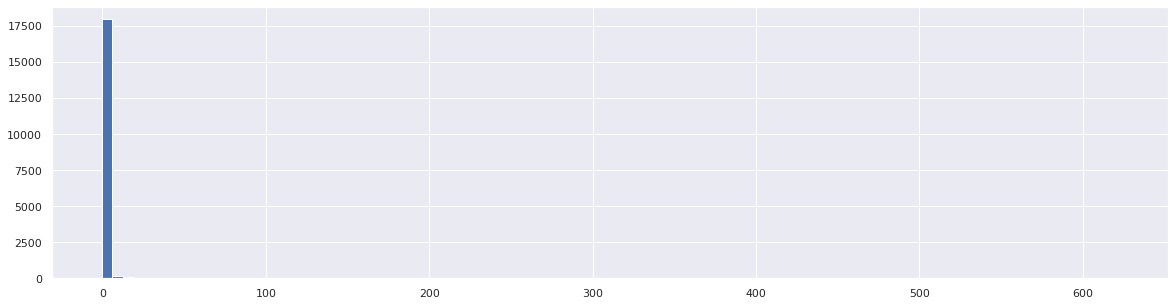

In [81]:
df["spread_usd_21d"].hist(bins=101)

113.43147050671598


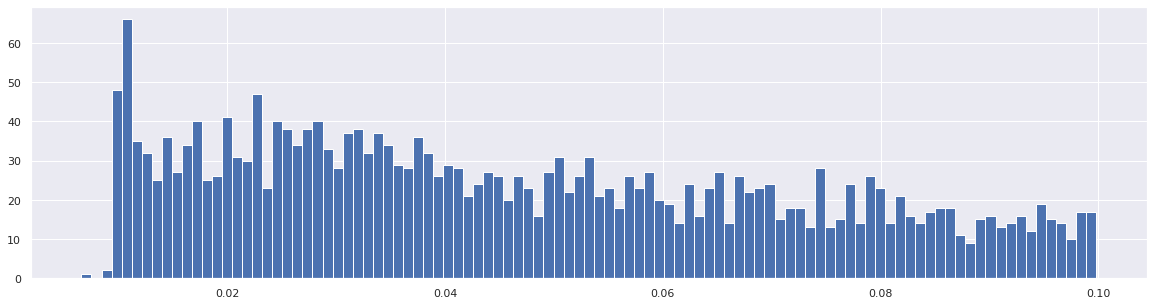

In [99]:
# col = "spread_bps_21d"
col = "spread_usd_21d"
df_val = df[df[col] <= 0.1]

# print(df_val)

df_val[col].hist(bins=101)

print(df_val[col].sum())

# df["spread_bps_21d"].hist(bins=101)

df["spread_bps_21d"].hist(bins=101)
# Generate liquidity plots

<AxesSubplot:>

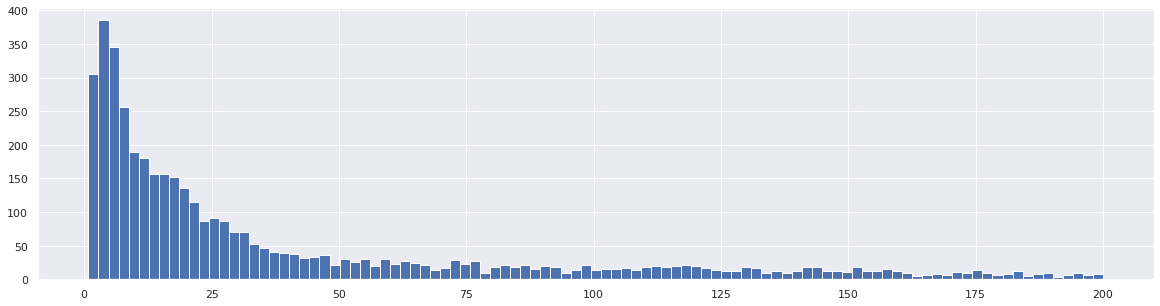

In [15]:
df[df["spread_bps_63d"] < 200]["spread_bps_63d"].hist(log=False, bins=101)

<AxesSubplot:>

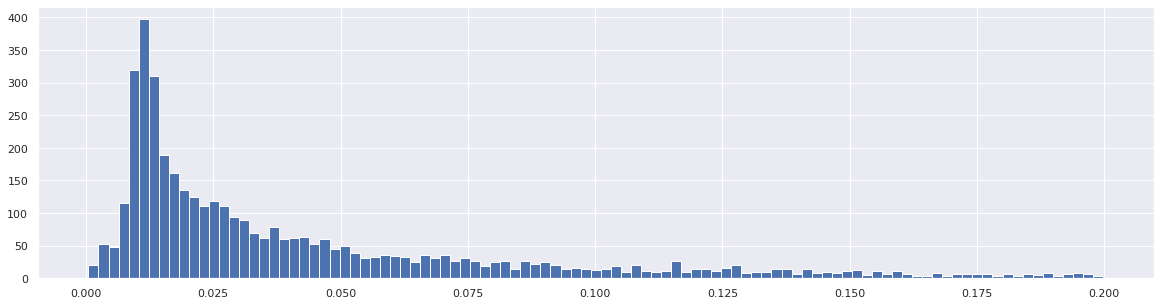

In [16]:
df[df["spread_usd_63d"] < 0.2]["spread_usd_63d"].hist(log=False, bins=101)

<AxesSubplot:>

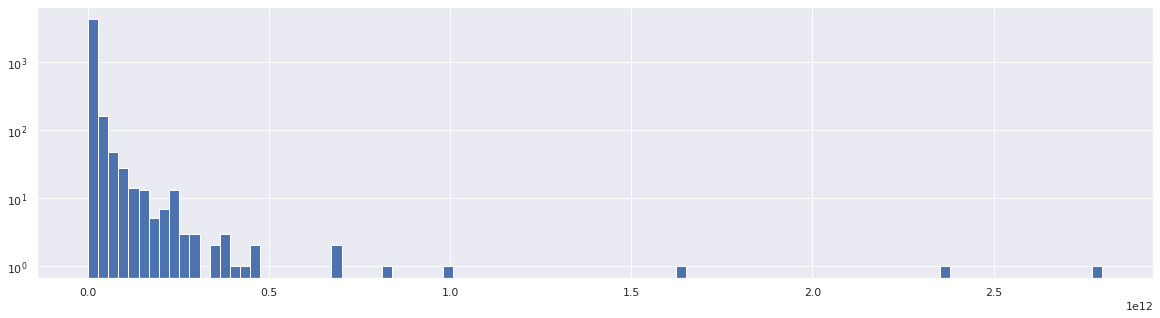

In [17]:
df["mkt_cap_usd_avg_90d"].hist(log=True, bins=100)

# Apply filters

In [18]:
filtered_df = vldlunut.apply_threshold_filters(df)

INFO  Number remaining=1826 after applying filters


In [19]:
filtered_df.describe()

,asset_id,infocode,num_shrs,last_close_usd,spread_bps_21d,spread_bps_42d,spread_bps_63d,spread_usd_21d,spread_usd_42d,spread_usd_63d,mdv_shares_21d,mdv_shares_42d,mdv_shares_63d,mdv_usd_21d,mdv_usd_42d,mdv_usd_63d,close_ct_21d,close_ct_42d,close_ct_63d,bd_ct_21d,bd_ct_42d,bd_ct_63d,volume,market_cap,mapped_asset_id,idc_pk,close_usd,mkt_cap_usd,notional_usd_sum_90d,notional_usd_avg_90d,close_usd_avg_90d,close_usd_ct_90d,mkt_cap_usd_avg_90d,spread_bps_21d_pct,spread_bps_42d_pct,spread_bps_63d_pct,spread_usd_21d_pct,spread_usd_42d_pct,spread_usd_63d_pct,mdv_shares_21d_pct,mdv_shares_42d_pct,mdv_shares_63d_pct,mdv_usd_21d_pct,mdv_usd_42d_pct,mdv_usd_63d_pct,market_cap_pct,mkt_cap_usd_avg_90d_pct
count,1.000000e+03,1000.000000,1.000000e+03,1000.000000,993.000000,996.000000,1000.000000,993.000000,996.000000,1000.000000,9.930000e+02,9.960000e+02,1.000000e+03,9.930000e+02,9.960000e+02,1.000000e+03,993.000000,996.000000,1000.000000,993.0,996.0,1000.0,9.870000e+02,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1.000000e+03,993.000000,996.000000,1000.000000,993.000000,996.000000,1000.000000,993.000000,996.000000,1000.000000,993.000000,996.000000,1000.000000,1000.000000,1000.000000
mean,2.233992e+05,130529.504000,3.786842e+08,102.652161,3.998968,3.853070,3.841890,0.041808,0.039917,0.038791,3.425937e+06,3.339630e+06,3.158716e+06,3.148118e+08,3.084401e+08,2.890612e+08,19.955690,39.864458,59.661000,20.0,40.0,60.0,4.118011e+06,3.905138e+10,2.233992e+05,114442.612000,102.652160,3.909675e+10,2.020845e+10,3.332815e+08,106.513843,60.662000,4.068506e+10,0.111969,0.109952,0.109127,0.396654,0.394026,0.399858,0.771790,0.766203,0.761222,0.841675,0.840455,0.840642,0.847469,0.846568
std,4.839303e+05,104624.982249,8.526326e+08,171.576429,1.762167,1.596471,1.537766,0.113452,0.105508,0.093202,7.912006e+06,7.775949e+06,7.325209e+06,1.198581e+09,1.198146e+09,1.126899e+09,0.862556,1.903370,3.744342,0.0,0.0,0.0,9.034502e+06,1.388219e+11,4.839303e+05,93511.605924,171.576427,1.388520e+11,8.008656e+10,1.313777e+09,179.963303,3.744299,1.459563e+11,0.067917,0.064359,0.063307,0.232959,0.228133,0.223486,0.166573,0.172040,0.175375,0.113655,0.114666,0.114468,0.109960,0.110366
min,1.003000e+04,6347.000000,1.759660e+07,11.850001,0.625686,0.966530,0.825359,0.008060,0.007982,0.007490,9.501150e+04,1.004340e+05,9.908200e+04,4.292600e+06,5.028266e+06,5.243254e+06,1.000000,1.000000,4.000000,20.0,40.0,60.0,9.814200e+04,7.907463e+08,1.003000e+04,3200.000000,11.850000,7.907484e+08,3.643217e+08,5.972487e+06,15.727213,5.000000,8.072684e+08,0.000218,0.000218,0.000217,0.030144,0.034851,0.037343,0.280835,0.280789,0.269937,0.491843,0.510408,0.518478,0.502485,0.500756
25%,1.251350e+04,59440.500000,8.036293e+07,36.090000,2.592981,2.539460,2.578961,0.012239,0.012161,0.012492,6.212145e+05,5.942168e+05,5.684316e+05,3.500876e+07,3.340099e+07,3.239804e+07,20.000000,40.000000,60.000000,20.0,40.0,60.0,7.244205e+05,4.378901e+09,1.251350e+04,49626.000000,36.090000,4.340089e+09,2.274916e+09,3.818405e+07,37.337459,61.000000,4.423031e+09,0.054391,0.054618,0.054440,0.196374,0.202026,0.213526,0.660866,0.649447,0.638643,0.761801,0.761817,0.762427,0.772801,0.771882
50%,1.491000e+04,66122.000000,1.596659e+08,65.005006,3.812235,3.726103,3.743113,0.019683,0.019340,0.019585,1.334470e+06,1.308238e+06,1.211431e+06,9.525369e+07,8.842661e+07,8.435128e+07,20.000000,40.000000,60.000000,20.0,40.0,60.0,1.595048e+06,1.006668e+10,1.491000e+04,57005.000000,65.005001,1.006330e+10,5.929196e+09,9.739464e+07,65.038771,61.000000,1.051155e+10,0.109000,0.108800,0.108663,0.366754,0.367131,0.371906,0.808136,0.806808,0.798357,0.865564,0.863291,0.864707,0.868813,0.868057
75%,1.731250e+04,259585.500000,3.423661e+08,117.470007,5.275067,5.168715,5.144824,0.039938,0.037142,0.037237,2.922458e+06,2.839944e+06,2.635518e+06,2.467262e+08,2.450512e+08,2.266653e+08,20.000000,40.000000,60.000000,20.0,40.0,60.0,3.544226e+06,2.966558e+10,1.731250e+04,169048.750000,117.469999,2.

In [20]:
filtered_df[filtered_df["ticker"].isna()]

,region,trade_date,asset_id,infocode,country,currency,is_major_sec,is_prim_qt,num_shrs,last_close_usd,spread_bps_21d,spread_bps_42d,spread_bps_63d,spread_usd_21d,spread_usd_42d,spread_usd_63d,mdv_shares_21d,mdv_shares_42d,mdv_shares_63d,mdv_usd_21d,mdv_usd_42d,mdv_usd_63d,close_ct_21d,close_ct_42d,close_ct_63d,bd_ct_21d,bd_ct_42d,bd_ct_63d,ticker,volume,market_cap,mapped_asset_id,idc_pk,prev_date,sectype,close_usd,mkt_cap_usd,notional_usd_sum_90d,notional_usd_avg_90d,close_usd_avg_90d,close_usd_ct_90d,mkt_cap_usd_avg_90d,spread_bps_21d_pct,spread_bps_42d_pct,spread_bps_63d_pct,spread_usd_21d_pct,spread_usd_42d_pct,spread_usd_63d_pct,mdv_shares_21d_pct,mdv_shares_42d_pct,mdv_shares_63d_pct,mdv_usd_21d_pct,mdv_usd_42d_pct,mdv_usd_63d_pct,market_cap_pct,mkt_cap_usd_avg_90d_pct
2985,am,2022-03-01,14742,67162.0,US,USD,True,True,66050429.0,155.960010,NaN,NaN,0.825359,NaN,NaN,0.012872,NaN,NaN,566404.0,NaN,NaN,8.833637e+07,NaN,NaN,7.0,NaN,NaN,60.0,NaN,NaN,1.030123e+10,14742.0,49629.0,2021-12-10,NA:C,155.960007,1.030116e+10,7.524066e+08,9.405082e+07,155.817501,8.0,1.029175e+10,NaN,NaN,0.000217,NaN,NaN,0.229049,NaN,NaN,0.637346,NaN,NaN,0.867733,0.870759,0.866220
1167,am,2022-03-01,11806,50123.0,US,USD,True,True,91195060.0,293.590090,NaN,NaN,2.093970,NaN,NaN,0.061477,NaN,NaN,2371354.5,NaN,NaN,6.962062e+08,NaN,NaN,8.0,NaN,NaN,60.0,NaN,NaN,2.677397e+10,11806.0,51364.0,2021-12-13,NA:C,293.589996,2.677394e+10,1.725317e+10,1.917019e+09,294.336670,9.0,2.684203e+10,NaN,NaN,0.031915,NaN,NaN,0.687799,NaN,NaN,0.893668,NaN,NaN,0.980765,0.932354,0.931057
4296,am,2022-03-01,16784,276608.0,US,USD,True,True,399080320.0,108.610010,2.338746,1.904440,2.633582,0.025401,0.020684,0.028603,2669657.0,2363585.0,2124573.0,2.899515e+08,2.567090e+08,2.307499e+08,19.0,39.0,59.0,20.0,40.0,60.0,NaN,NaN,4.334412e+10,16784.0,241082.0,2022-02-25,NA:C,108.610001,4.334408e+10,2.053313e+10,3.422188e+08,122.021833,60.0,4.944139e+10,0.043906,0.027881,0.057317,0.443425,0.385973,0.484802,0.899935,0.890286,0.880268,0.944747,0.937121,0.935595,0.958937,0.963475
26089,am,2022-03-01,1462584,322904.0,US,USD,True,True,351394560.0,47.279999,NaN,NaN,2.644993,NaN,NaN,0.012506,NaN,NaN,1876529.5,NaN,NaN,8.872231e+07,NaN,NaN,4.0,NaN,NaN,60.0,NaN,NaN,1.661393e+10,1462584.0,310894.0,2021-12-07,NA:C,47.279999,1.661396e+10,4.345227e+08,8.690454e+07,47.242000,5.0,1.660060e+10,NaN,NaN,0.058185,NaN,NaN,0.214286,NaN,NaN,0.864275,NaN,NaN,0.867949,0.902961,0.900584
20824,am,2022-03-01,1221924,294156.0,US,USD,True,True,192141440.0,83.330002,NaN,1.199448,3.076326,NaN,0.009995,0.025635,NaN,3498864.0,838327.0,NaN,2.915603e+08,6.985779e+07,NaN,1.0,21.0,NaN,40.0,60.0,NaN,NaN,1.601115e+10,1221924.0,271132.0,2021-12-31,NA:C,83.330002,1.601119e+10,1.983185e+09,9.014477e+07,81.674091,22.0,1.569302e+10,NaN,0.003485,0.080113,NaN,0.089959,0.449631,NaN,0.928231,0.723579,NaN,0.947311,0.845904,0.901448,0.896693
2873,am,2022-03-01,14549,273671.0,US,USD,True,True,306111360.0,41.600007,NaN,2.995109,3.098710,NaN,0.012460,0.012891,NaN,192380.0,189685.0,NaN,8.003009e+06,7.890897e+06,NaN,20.0,40.0,NaN,40.0,60.0,NaN,NaN,1.273423e+10,14549.0,226007.0,2022-01-28,NA:C,41.599998,1.273422e+10,8.699702e+08,2.121878e+07,41.908536,41.0,1.282866e+10,NaN,0.077107,0.081850,NaN,0.213025,0.229917,NaN,0.395490,0.387724,NaN,0.571552,0.571212,0.885455,0.883510
4638,am,2022-03-01,17386,273815.0,US,USD,True,True,77888930.0,38.220002,NaN,NaN,3.556814,NaN,NaN,0.013594,NaN,NaN,2601832.0,NaN,NaN,9.944202e+07,NaN,NaN,17.0,NaN,NaN,60.0,NaN,NaN,2.976915e+09,17386.0,235769.0,2021-12-27,NA:C,38.220001,2.977720e+09,2.169318e+09,1.205177e+08,38.031111,18.0,2.963004e+09,NaN,NaN,0.100738,NaN,NaN,0.253582,NaN,NaN,0.905338,NaN,NaN,0.875946,0.713421,0.709747
3381,am,2022-03-01,15353,260607.0,US,USD,True,True,35040840.0,79.130005,4.311267,2.895952,3.683751,0.034115,0.022916,0.029150,2501347.0,2640615.5,1994796.5,1.979316e+08,2.089519e+08,1.578483e+08,16.0,36.0,56.0,20.0,40.0,60.0,NaN,NaN,2.772782e+09,15353.0,171145.0,2022-02-22,NA:C,79.129997,2.765673e+09,8

In [21]:
tickers = filtered_df["ticker"].dropna().to_list()

In [35]:
assert 0

AssertionError: 

# Get universe dataframe at datetime

In [22]:
universe = vldlunut.get_filtered_universe_dfs([date], connection)[0]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO  Loading cached version from memory ...
INFO  Loading cached version from memory done (0.036 s)
INFO    --> Cache data for 'get_liquidity_data' from 'mem' cache (size=nan, time=0.05 s, tag=None, loc=/mnt/tmpfs/tmp.cache.mem)
INFO  Number remaining=4628 after applying filters


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=1826 after applying filters


In [23]:
dates = pd.date_range(
    start="2017-01-01", end="2022-03-01", freq=pd.offsets.BMonthBegin()
)

In [24]:
universe_dfs = vldlunut.get_filtered_universe_dfs(dates, connection)

  0%|          | 0/63 [00:00<?, ?it/s]

INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.790 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.91 s, tag=None, loc=no_cache)
WARNING Unable to generate universe on date=2017-01-02 00:00:00
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.604 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.73 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4079 after applying filters
INFO  Number remaining=1639 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.756 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.88 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4062 after applying filters
INFO  Number remaining=1631 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.639 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.76 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4062 after applying filters
INFO  Number remaining=1619 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.764 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.89 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4072 after applying filters
INFO  Number remaining=1620 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.704 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.83 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4069 after applying filters
INFO  Number remaining=1624 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.702 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.83 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4068 after applying filters
INFO  Number remaining=1624 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.610 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.73 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4058 after applying filters
INFO  Number remaining=1590 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.777 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.90 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4047 after applying filters
INFO  Number remaining=1560 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.730 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.86 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4019 after applying filters
INFO  Number remaining=1550 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.570 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.70 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4025 after applying filters
INFO  Number remaining=1597 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.734 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.86 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4037 after applying filters
INFO  Number remaining=1608 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.714 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.84 s, tag=None, loc=no_cache)
WARNING Unable to generate universe on date=2018-01-01 00:00:00
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.748 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.88 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4009 after applying filters
INFO  Number remaining=1610 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.815 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.94 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4001 after applying filters
INFO  Number remaining=1596 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.711 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.84 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=3992 after applying filters
INFO  Number remaining=1602 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.676 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.81 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4002 after applying filters
INFO  Number remaining=1613 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.671 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.81 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4014 after applying filters
INFO  Number remaining=1613 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.773 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.90 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4026 after applying filters
INFO  Number remaining=1614 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.699 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.83 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4028 after applying filters
INFO  Number remaining=1634 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.743 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.87 s, tag=None, loc=no_cache)
WARNING Unable to generate universe on date=2018-09-03 00:00:00
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.638 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.77 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4016 after applying filters
INFO  Number remaining=1634 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.684 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.81 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4005 after applying filters
INFO  Number remaining=1644 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (1.005 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=1.14 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4005 after applying filters
INFO  Number remaining=1674 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.814 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.95 s, tag=None, loc=no_cache)
WARNING Unable to generate universe on date=2019-01-01 00:00:00
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.763 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.89 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=3986 after applying filters
INFO  Number remaining=1687 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.673 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.80 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=3981 after applying filters
INFO  Number remaining=1686 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.696 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.83 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=3962 after applying filters
INFO  Number remaining=1663 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.604 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.74 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=3973 after applying filters
INFO  Number remaining=1684 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.669 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.80 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=3985 after applying filters
INFO  Number remaining=1664 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.586 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.72 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4001 after applying filters
INFO  Number remaining=1680 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.758 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.89 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4001 after applying filters
INFO  Number remaining=1675 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.602 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.73 s, tag=None, loc=no_cache)
WARNING Unable to generate universe on date=2019-09-02 00:00:00
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.680 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.81 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4003 after applying filters
INFO  Number remaining=1666 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.528 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.66 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=3996 after applying filters
INFO  Number remaining=1649 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.729 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.86 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=3997 after applying filters
INFO  Number remaining=1656 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.666 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.80 s, tag=None, loc=no_cache)
WARNING Unable to generate universe on date=2020-01-01 00:00:00
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.914 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=1.05 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=3974 after applying filters
INFO  Number remaining=1653 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.737 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.87 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=3979 after applying filters
INFO  Number remaining=1616 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.929 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=1.07 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=3966 after applying filters
INFO  Number remaining=1479 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.773 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.91 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=3959 after applying filters
INFO  Number remaining=1508 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.827 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.97 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=3958 after applying filters
INFO  Number remaining=1518 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.839 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=1.05 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=3965 after applying filters
INFO  Number remaining=1546 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.804 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.95 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=3974 after applying filters
INFO  Number remaining=1556 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.739 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.88 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=3991 after applying filters
INFO  Number remaining=1587 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.782 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.93 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4007 after applying filters
INFO  Number remaining=1570 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.815 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.96 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4035 after applying filters
INFO  Number remaining=1585 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.979 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=1.13 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4047 after applying filters
INFO  Number remaining=1620 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.714 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.86 s, tag=None, loc=no_cache)
WARNING Unable to generate universe on date=2021-01-01 00:00:00
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.739 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.89 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4096 after applying filters
INFO  Number remaining=1615 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.976 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=1.13 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4132 after applying filters
INFO  Number remaining=1611 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.864 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=1.02 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4175 after applying filters
INFO  Number remaining=1637 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (1.015 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=1.17 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4212 after applying filters
INFO  Number remaining=1665 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.649 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.81 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4244 after applying filters
INFO  Number remaining=1695 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.700 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.86 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4297 after applying filters
INFO  Number remaining=1713 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.639 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.80 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4404 after applying filters
INFO  Number remaining=1728 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.945 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=1.11 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4444 after applying filters
INFO  Number remaining=1744 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.777 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.94 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4493 after applying filters
INFO  Number remaining=1764 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.827 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=1.00 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4541 after applying filters
INFO  Number remaining=1792 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.681 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.85 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4587 after applying filters
INFO  Number remaining=1791 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (0.741 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=0.91 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4610 after applying filters
INFO  Number remaining=1811 after applying filters
INFO  Updating cached version on disk ...


Retrieving datastream_liquidity data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  Updating cached version on disk done (1.065 s)
INFO    --> Cache data for 'get_liquidity_data' from 'no_cache' cache (size=nan, time=1.23 s, tag=None, loc=no_cache)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4620 after applying filters
INFO  Number remaining=1811 after applying filters
INFO  Loading cached version from memory ...
INFO  Loading cached version from memory done (0.031 s)
INFO    --> Cache data for 'get_liquidity_data' from 'mem' cache (size=nan, time=0.04 s, tag=None, loc=/mnt/tmpfs/tmp.cache.mem)


/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


INFO  Number remaining=4628 after applying filters
INFO  Number remaining=1826 after applying filters


In [25]:
df = universe_dfs[10]

In [26]:
df.head()

,trade_date,asset_id,ticker
0,2017-12-01,16572,A
1,2017-12-01,1218568,AA
2,2017-12-01,15900,AAL
3,2017-12-01,12618,AAN
4,2017-12-01,11666,AAOI


In [27]:
df = vldlunut.combine_universe_dfs(universe_dfs)

  0%|          | 0/56 [00:00<?, ?it/s]

In [28]:
df.iloc[0:10, 0:10]

asset_id,16572,1218568,15900,12618,11233,17085,12624,17511,13323,16793
2017-02-01,True,True,True,True,True,True,True,True,True,True
2017-03-01,True,True,True,True,True,True,True,True,True,True
2017-04-03,True,True,True,True,True,True,False,True,True,True
2017-05-01,True,True,True,True,True,True,False,True,True,True
2017-06-01,True,True,True,True,True,True,False,True,True,True
2017-07-03,True,True,True,True,True,True,False,True,True,True
2017-08-01,True,True,True,True,True,True,True,False,True,True
2017-09-01,True,False,True,True,True,True,True,False,True,True
2017-10-02,True,False,True,True,True,True,True,False,True,True
2017-11-01,True,True,True,True,True,True,True,True,True,True


In [29]:
asset_ids = df.columns.to_list()

In [30]:
len(asset_ids)

1876

<AxesSubplot:>

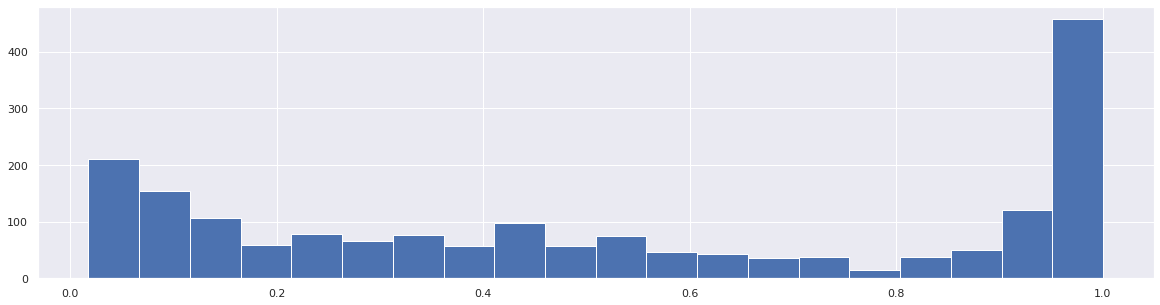

In [31]:
(df.sum(axis=0) / df.shape[0]).hist(bins=20)

<AxesSubplot:title={'center':'Universe size count'}>

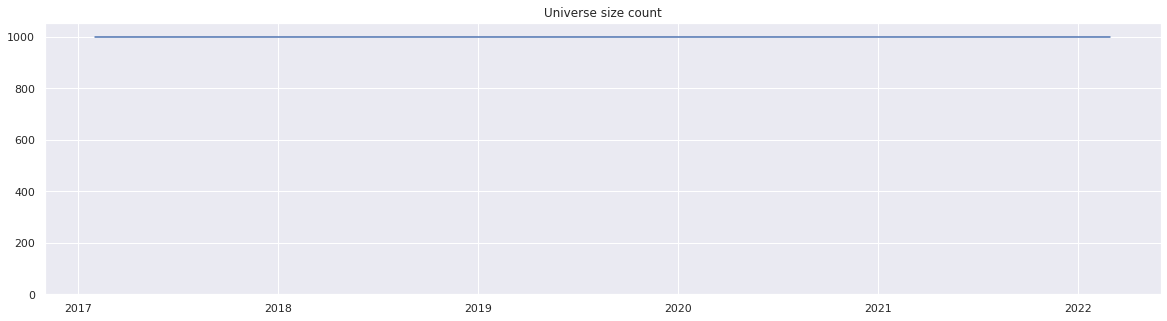

In [32]:
df.sum(axis=1).plot(ylim=(0, None), title="Universe size count")

# Save universe

In [33]:
# Write union of EGIDs to a csv
assert 0
pd.Series(data=df.columns).to_csv("universe_20210810.csv", index=False)

AssertionError: 

# Read universe

In [ ]:
import pandas as pd

In [ ]:
universe = pd.read_csv("s3://eglp-spm-sasm/data/universe_20210810.csv")

In [ ]:
universe

In [ ]:
universe["asset_id"].tolist()